In [2]:
# Setup and Imports
%load_ext autoreload
%autoreload 2

from data_structures import Node, Edge, Graph
from definitions import graph
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import Patch
from matplotlib.patches import FancyBboxPatch
import numpy as np


In [3]:
"""
Snow Mechanical Parameters Calculation Graph Visualization

This notebook visualizes the directed graph of calculation methods for snow mechanical
parameters defined in definitions.py.

The graph includes:
- Parameter nodes (measured and calculated)
- Merge nodes (combining multiple inputs for a method)
- Edges (data flow and method transformations)

Visualizations included:
1. Custom hierarchical layout with detailed node styling
2. Spring layout using networkx
3. Detailed calculation path analysis
4. Focused subgraph visualizations for each parameter
"""


print("Graph loaded successfully!")
print(f"Total nodes: {len(graph.nodes)}")
print(f"Total edges: {len(graph.edges)}")


Graph loaded successfully!
Total nodes: 12
Total edges: 21


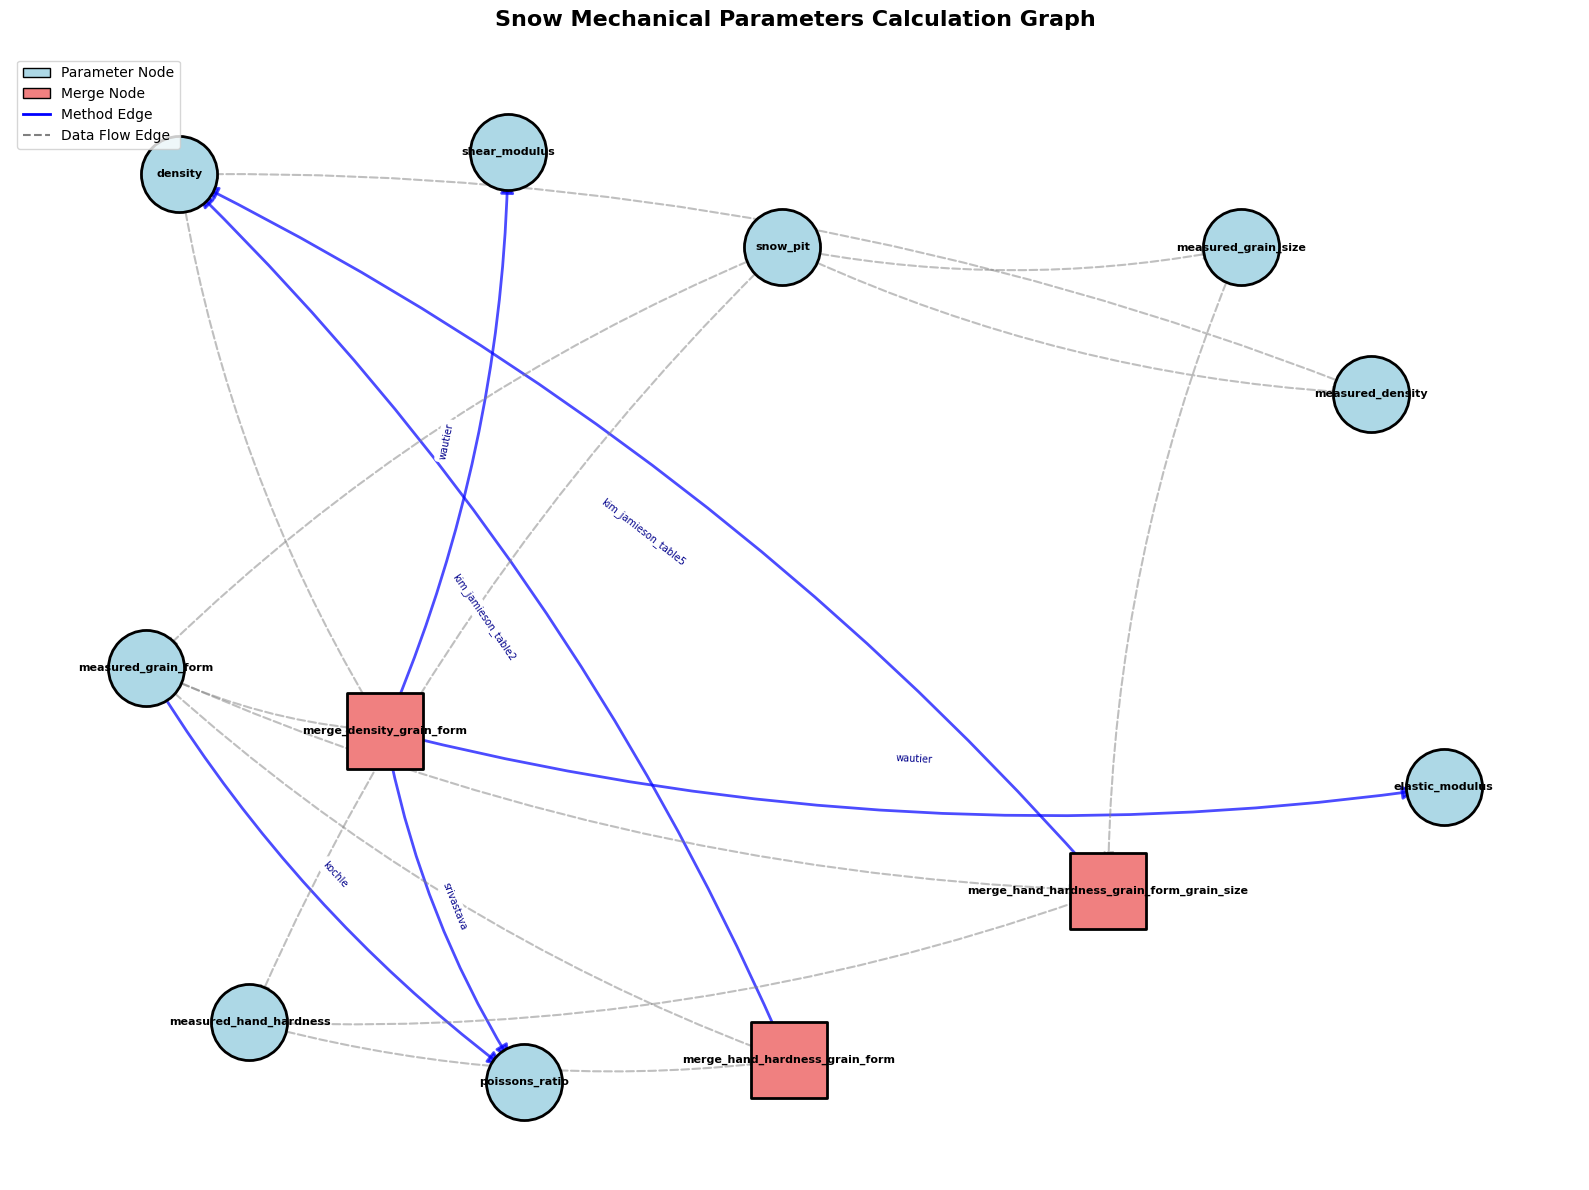


Graph Statistics:
  Parameter nodes: 9
  Merge nodes: 3
  Method edges: 6
  Data flow edges: 12


In [5]:
# Visualize Graph
# Create a NetworkX graph for visualization
G = nx.DiGraph()

# Add nodes with their types
node_types = {}
for node in graph.nodes:
    G.add_node(node.parameter)
    node_types[node.parameter] = node.type

# Add edges
for edge in graph.edges:
    label = edge.method_name if edge.method_name else ""
    G.add_edge(edge.start.parameter, edge.end.parameter, method=label)

# Create layout
pos = nx.spring_layout(G, k=2, iterations=50, seed=42)

# Create figure
plt.figure(figsize=(16, 12))

# Separate nodes by type for different styling
parameter_nodes = [n for n, t in node_types.items() if t == "parameter"]
merge_nodes = [n for n, t in node_types.items() if t == "merge"]

# Draw parameter nodes (circles)
nx.draw_networkx_nodes(G, pos, 
                       nodelist=parameter_nodes,
                       node_color='lightblue',
                       node_shape='o',
                       node_size=3000,
                       edgecolors='black',
                       linewidths=2)

# Draw merge nodes (squares)
nx.draw_networkx_nodes(G, pos,
                       nodelist=merge_nodes,
                       node_color='lightcoral',
                       node_shape='s',
                       node_size=3000,
                       edgecolors='black',
                       linewidths=2)

# Draw edges with arrows
# Separate edges by whether they have a method (transformation) or not (data flow)
method_edges = [(u, v) for u, v, d in G.edges(data=True) if d['method']]
data_flow_edges = [(u, v) for u, v, d in G.edges(data=True) if not d['method']]

# Draw method edges (solid, thicker)
nx.draw_networkx_edges(G, pos,
                       edgelist=method_edges,
                       edge_color='blue',
                       width=2,
                       alpha=0.7,
                       arrows=True,
                       arrowsize=20,
                       arrowstyle='-|>',
                       connectionstyle='arc3,rad=0.1',
                       min_source_margin=20,
                       min_target_margin=20)

# Draw data flow edges (dashed, thinner)
nx.draw_networkx_edges(G, pos,
                       edgelist=data_flow_edges,
                       edge_color='gray',
                       width=1.5,
                       alpha=0.5,
                       arrows=True,
                       arrowsize=15,
                       arrowstyle='-|>',
                       style='dashed',
                       connectionstyle='arc3,rad=0.1',
                       min_source_margin=20,
                       min_target_margin=20)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

# Draw edge labels for methods
edge_labels = {(u, v): d['method'] for u, v, d in G.edges(data=True) if d['method']}
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=7, font_color='darkblue')

# Add legend
legend_elements = [
    Patch(facecolor='lightblue', edgecolor='black', label='Parameter Node'),
    Patch(facecolor='lightcoral', edgecolor='black', label='Merge Node'),
    plt.Line2D([0], [0], color='blue', linewidth=2, label='Method Edge'),
    plt.Line2D([0], [0], color='gray', linewidth=1.5, linestyle='--', label='Data Flow Edge')
]
plt.legend(handles=legend_elements, loc='upper left', fontsize=10)

plt.title("Snow Mechanical Parameters Calculation Graph", fontsize=16, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"\nGraph Statistics:")
print(f"  Parameter nodes: {len(parameter_nodes)}")
print(f"  Merge nodes: {len(merge_nodes)}")
print(f"  Method edges: {len(method_edges)}")
print(f"  Data flow edges: {len(data_flow_edges)}")


## Summary and Quick Reference

### Graph Structure

**Total Components:**
- 12 nodes (9 parameter nodes + 3 merge nodes)
- 21 edges (7 method edges + 14 data flow edges)

### Node Types

1. **Snow Pit (Yellow)** - Source of all measurements:
   - `snow_pit`

2. **Measured Parameters (Green)** - Direct measurements from snow pit:
   - `measured_density`
   - `measured_hand_hardness`
   - `measured_grain_form`
   - `measured_grain_size`

3. **Calculated Parameters (Blue)** - Target outputs:
   - `density` (3 calculation methods + 1 direct measurement)
   - `elastic_modulus` (3 calculation methods)
   - `poissons_ratio` (2 calculation methods)
   - `shear_modulus` (1 calculation method)

4. **Merge Nodes (Red)** - Combine inputs for methods:
   - `merge_hand_hardness_grain_form` (for density calculations)
   - `merge_hand_hardness_grain_form_grain_size` (for density calculations)
   - `merge_density_grain_form` (shared by elastic modulus, Poisson's ratio, and shear modulus)

### Edge Types

- **Solid Blue Arrows**: Method transformations (calculations)
- **Dashed Gray Arrows**: Data flow (parameter passing)

### Available Calculation Methods

**Density:**
- Direct measurement from `measured_density`
- `geldsetzer` (hand_hardness + grain_form)
- `kim_jamieson_table2` (hand_hardness + grain_form)
- `kim_jamieson_table5` (hand_hardness + grain_form + grain_size)

**Elastic Modulus:**
- `bergfeld` (density + grain_form)
- `kochle` (density + grain_form)
- `wautier` (density + grain_form)

**Poisson's Ratio:**
- `kochle` (grain_form only)
- `srivastava` (density + grain_form)

**Shear Modulus:**
- `wautier` (density + grain_form)

### Key Insights

1. **Multiple Paths**: Each calculated parameter can be derived through multiple independent methods
2. **Shared Merge Nodes**: The `merge_density_grain_form` node is reused by multiple methods (elastic modulus, Poisson's ratio, and shear modulus), demonstrating efficient graph structure
3. **Flexibility**: The graph structure allows for different calculation strategies based on available measurements
4. **Method Validation**: Multiple methods for the same parameter enable cross-validation of results
5. **Hierarchical Flow**: Data flows from snow_pit → measured parameters → merge nodes → calculated parameters
